In [2]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [3]:
from zipfile import ZipFile
directory_18 = r'F:\Ecobee\files\2018_sac'
df_sac_18_daily_midpeak = pd.DataFrame()
hours_to_keep = [12, 13, 14, 15, 16, 20, 21, 22, 23]
import datetime
for filename in os.listdir(directory_18):
    myzip = ZipFile(os.path.join(directory_18, filename))
    g = myzip.open(filename[:-4])
    df_temp = pd.read_csv(g, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour.isin(hours_to_keep)) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_18_daily_midpeak = pd.concat([df_sac_18_daily_midpeak, df_day])
    g.close()
    myzip.close()

In [4]:
df_sac_18_daily_midpeak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21249 entries, 0 to 121
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 21249 non-null  object 
 1   daily_total_heating  21249 non-null  float64
 2   daily_total_cooling  21249 non-null  float64
 3   user_id              21249 non-null  object 
dtypes: float64(2), object(2)
memory usage: 830.0+ KB


In [5]:
# pd.set_option('display.max_rows', None)
# #remove user_ids that have no cooling consumption at all for 2018
# df_18_temp=df_sac_18_daily_midpeak[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
# df_18_temp['any_usage']=(df_18_temp.daily_total_cooling>0)
# df_18_temp=df_18_temp['user_id'][df_18_temp['any_usage']==True]
# df_sac_18_daily_midpeak=pd.merge(df_18_temp,df_sac_18_daily_midpeak,how='left', on='user_id')


In [6]:
df_sac_18_daily_midpeak.head()

,Date,daily_total_heating,daily_total_cooling,user_id
0,2018-06-01,0.0,0.975000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2018-06-02,0.0,1.983333,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2018-06-03,0.0,3.512500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2018-06-04,0.0,1.895833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2018-06-05,0.0,1.179167,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [8]:
from zipfile import ZipFile
directory_19 = r'F:\Ecobee\files\2019_sac'
df_sac_19_daily_midpeak = pd.DataFrame()
hours_to_keep = [12, 13, 14, 15, 16, 20, 21, 22, 23]
import datetime
for filename in os.listdir(directory_19):
    myzip = ZipFile(os.path.join(directory_19, filename))
    f = myzip.open(filename[:-4])
    df_temp = pd.read_csv(f, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour.isin(hours_to_keep)) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_19_daily_midpeak = pd.concat([df_sac_19_daily_midpeak, df_day])
    f.close()
    myzip.close()

In [9]:
df_sac_19_daily_midpeak.head()
#note there is a "time jump" from 2019-07-25 16:55 to 2019-07-26 17:00

,Date,daily_total_heating,daily_total_cooling,user_id
0,2019-06-01,0.0,2.045833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2019-06-02,0.0,1.479167,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2019-06-03,0.0,0.316667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2019-06-04,0.0,3.216667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2019-06-05,0.0,1.254167,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [10]:
pd.set_option('display.max_rows', None)
#remove user_ids that have no cooling consumption at all for 2019
df_19_temp=df_sac_19_daily_midpeak[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
df_19_temp['any_usage']=(df_19_temp.daily_total_cooling>0)
df_19_temp=df_19_temp['user_id'][df_19_temp['any_usage']==True]
df_sac_19_daily_midpeak=pd.merge(df_19_temp,df_sac_19_daily_midpeak,how='left', on='user_id')

In [11]:
df_sac_19_daily_midpeak.head()

,user_id,Date,daily_total_heating,daily_total_cooling
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-01,0.0,2.045833
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-02,0.0,1.479167
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-03,0.0,0.316667
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-04,0.0,3.216667
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-05,0.0,1.254167


In [12]:
df_sac_18n19_daily_midpeak=pd.concat([df_sac_18_daily_midpeak,df_sac_19_daily_midpeak])
df_sac_18n19_daily_midpeak.head()

,Date,daily_total_heating,daily_total_cooling,user_id
0,2018-06-01,0.0,0.975000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2018-06-02,0.0,1.983333,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2018-06-03,0.0,3.512500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2018-06-04,0.0,1.895833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2018-06-05,0.0,1.179167,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [13]:
df_sac_18n19_daily_midpeak['count'] = df_sac_18n19_daily_midpeak.groupby('user_id')['user_id'].transform('count')
df_sac_18n19_daily_midpeak['count'].value_counts(sort=True, ascending=False).head(10)

244    30744
122    16714
121     3509
243     1944
241      964
224      896
238      476
232      464
226      452
220      440
Name: count, dtype: int64

In [14]:
df_sac_18n19_daily_midpeak.head()

,Date,daily_total_heating,daily_total_cooling,user_id,count
0,2018-06-01,0.0,0.975000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,244
1,2018-06-02,0.0,1.983333,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,244
2,2018-06-03,0.0,3.512500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,244
3,2018-06-04,0.0,1.895833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,244
4,2018-06-05,0.0,1.179167,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,244


In [15]:
df_sac_18n19_daily_midpeak=df_sac_18n19_daily_midpeak[df_sac_18n19_daily_midpeak['count']>=241]
df_sac_18n19_daily_midpeak['Date']=pd.to_datetime(df_sac_18n19_daily_midpeak['Date'])
df_sac_18n19_daily_midpeak.head()

,Date,daily_total_heating,daily_total_cooling,user_id,count
0,2018-06-01,0.0,0.975000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,244
1,2018-06-02,0.0,1.983333,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,244
2,2018-06-03,0.0,3.512500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,244
3,2018-06-04,0.0,1.895833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,244
4,2018-06-05,0.0,1.179167,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,244


In [16]:
df_sac_18n19_daily_midpeak.user_id.nunique()

138

In [17]:
df_temperature=pd.read_csv(r'F:\Ecobee\smf_temp_18and19.csv', parse_dates=['DATE'])
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  730 non-null    object        
 1   NAME     730 non-null    object        
 2   DATE     730 non-null    datetime64[ns]
 3   TAVG     730 non-null    int64         
 4   TMAX     730 non-null    int64         
 5   TMIN     730 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 34.3+ KB


In [18]:
df_temperature.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-01,49,65,38
1,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-02,48,59,39
2,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-03,50,57,40
3,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-04,55,65,49
4,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-05,55,60,50


In [19]:
df_sac_18n19_daily_midpeak_w_temperature=pd.merge(df_sac_18n19_daily_midpeak,df_temperature,how='left', left_on='Date', right_on='DATE')
df_sac_18n19_daily_midpeak_w_temperature.head()

,Date,daily_total_heating,daily_total_cooling,user_id,count,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,2018-06-01,0.0,0.975000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,244,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
1,2018-06-02,0.0,1.983333,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,244,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-02,74,96,55
2,2018-06-03,0.0,3.512500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,244,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-03,78,98,58
3,2018-06-04,0.0,1.895833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,244,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-04,76,89,58
4,2018-06-05,0.0,1.179167,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,244,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-05,67,84,53


In [20]:
df_sac_18n19_daily_midpeak_w_temperature[
    'TAVG_less_62'] = df_sac_18n19_daily_midpeak_w_temperature['TAVG'] - 62
df_sac_18n19_daily_midpeak_w_temperature[
    'TAVG_less_62'] = df_sac_18n19_daily_midpeak_w_temperature[
        'TAVG_less_62'].apply(lambda x: x if x > 0 else 0)

In [21]:
df_sac_18n19_daily_midpeak_w_temperature['y2019']=np.where(df_sac_18n19_daily_midpeak_w_temperature['Date'].dt.year== 2019, 1, 0)
# [df_sac_18n19_daily_midpeak_w_temperature['Date'].dt.year==2019]
df_sac_18n19_daily_midpeak_w_temperature.describe()

,daily_total_heating,daily_total_cooling,count,TAVG,TMAX,TMIN,TAVG_less_62,y2019
count,33652.000000,33652.000000,33652.000000,33652.000000,33652.000000,33652.000000,33652.000000,33652.000000
mean,0.000112,1.839128,243.856294,72.740521,90.383840,58.507607,10.777428,0.499911
std,0.006961,1.870274,0.543084,5.188641,7.226468,4.006662,5.098282,0.500007
min,0.000000,0.000000,241.000000,58.000000,69.000000,45.000000,0.000000,0.000000
25%,0.000000,0.112500,244.000000,69.000000,86.000000,56.000000,7.000000,0.000000
50%,0.000000,1.404167,244.000000,73.000000,91.000000,58.000000,11.000000,0.000000
75%,0.000000,2.912500,244.000000,76.000000,96.000000,61.000000,14.000000,1.000000
max,0.779167,9.000000,244.000000,86.000000,105.000000,69.000000,24.000000,1.000000


In [22]:
df_sac_18n19_daily_midpeak_w_temperature[
    'interaction'] = df_sac_18n19_daily_midpeak_w_temperature[
        'TAVG_less_62'] * df_sac_18n19_daily_midpeak_w_temperature['y2019']

In [23]:
import statsmodels.api as sm


def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit(cov_type='HC1')
    return result.params


#This is what you need
results=df_sac_18n19_daily_midpeak_w_temperature.groupby('user_id').apply(
    regress, 'daily_total_cooling', ['TAVG_less_62','interaction']).reset_index()
results.head()

,user_id,TAVG_less_62,interaction,intercept
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,0.146350,-0.028619,0.237301
1,00e2f68ec737f7480114a67bbef7c5f65b6b8516,0.219660,-0.022763,-0.907832
2,01479a9a84e1722791f2b440f6d4f14f51025499,0.113567,-0.001068,0.273397
3,0150a428f7cc891b6a69cb7db390869c96a24f1d,0.077834,0.218693,-0.190413
4,02dc9385bcf16019883895622d8af493de236faa,0.216946,0.066871,0.014029


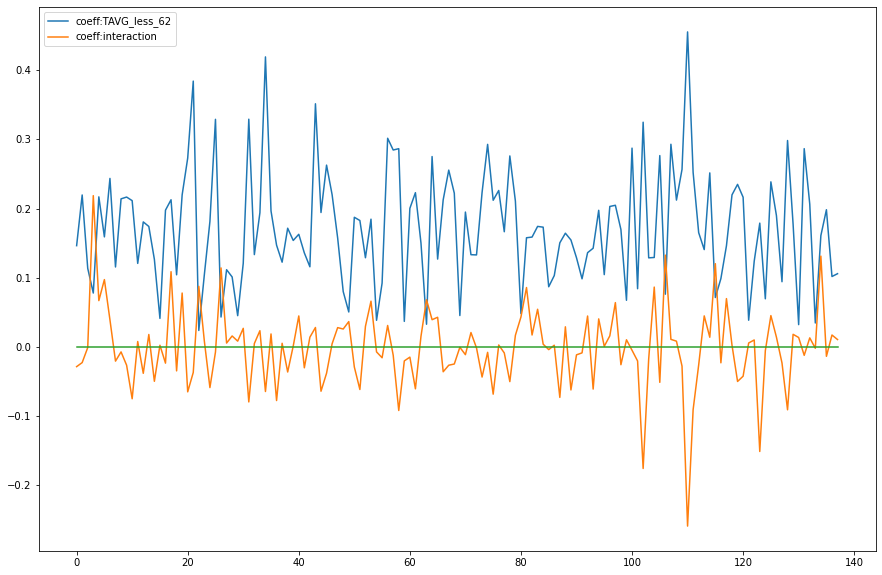

In [24]:
# x axis range
x = range(len(results))
plt.figure(figsize=(15,10))
# y2
plt.plot(x,results['TAVG_less_62'],label='coeff:TAVG_less_62')
# y2
plt.plot(x,results['interaction'],label='coeff:interaction')
# y=0 line 
plt.plot(x,[0] * len(results))
plt.legend(loc="upper left")

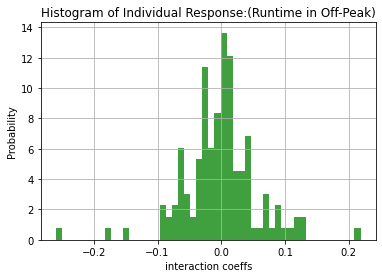

In [25]:
plt.hist(results['interaction'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('interaction coeffs')
plt.ylabel('Probability')
plt.title('Histogram of Individual Response:(Runtime in Off-Peak)')
plt.grid(True)
plt.show()

In [26]:
print(results[results.interaction > 0.01].count())
print(results[results.interaction < -0.01].count())

user_id         53
TAVG_less_62    53
interaction     53
intercept       53
dtype: int64
user_id         55
TAVG_less_62    55
interaction     55
intercept       55
dtype: int64


In [27]:
print(results['interaction'][results.interaction > 0.01].sum())
print(results['interaction'][results.interaction < -0.01].sum())
# the sum of negative interaction coefficients has a larger scale

2.564732008650442
-2.749878626290191


In [28]:
df_sac_18n19_daily_midpeak_w_temperature['const']=1
reg1 = sm.OLS(endog=df_sac_18n19_daily_midpeak_w_temperature['daily_total_cooling'], \
              exog=df_sac_18n19_daily_midpeak_w_temperature[['TAVG_less_62','interaction','const']], \
    missing='drop')
reg_result = reg1.fit(cov_type='HC1')
print(reg_result.summary())
#Mid-peak hours: Noon to Midnight except 5-8pm (not removing zero consumption)
#2019 consumption NOT CHANGED

                             OLS Regression Results                            
Dep. Variable:     daily_total_cooling   R-squared:                       0.220
Model:                             OLS   Adj. R-squared:                  0.220
Method:                  Least Squares   F-statistic:                     4728.
Date:                 Wed, 21 Apr 2021   Prob (F-statistic):               0.00
Time:                         11:04:41   Log-Likelihood:                -64646.
No. Observations:                33652   AIC:                         1.293e+05
Df Residuals:                    33649   BIC:                         1.293e+05
Df Model:                            2                                         
Covariance Type:                   HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
TAVG_less_62     0.1728      0.002    

In [29]:
df_sac_18n19_daily_midpeak.user_id.nunique()

138

# Mid-peak hours: 2019 consumption NOT CHANGED